[*********************100%***********************]  3 of 3 completed


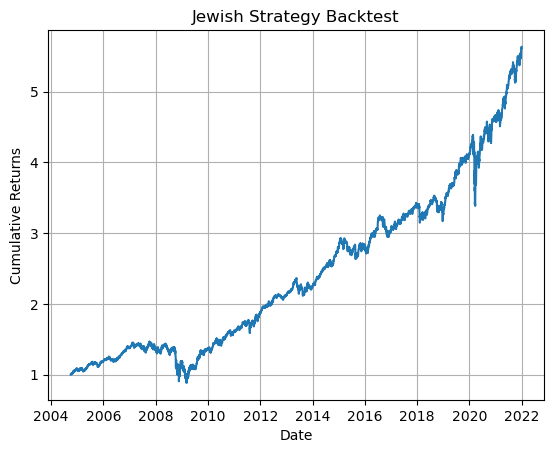

Initial Capital: $10000.00
Final Capital: $56304.22
Annualized Return (CAGR): 8.18%
Annualized Volatility: 14.70%
Best Year: 8.62%
Worst Year: -8.18%
Max Drawdown: -39.80%
Sharpe Ratio: 0.05


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def get_data(tickers, start_date, end_date):
    data = yf.download(tickers, start=start_date, end=end_date)["Adj Close"]
    return pd.DataFrame(data)  # Convert Series to DataFrame

def calculate_weights(data):
    # Calculate weights based on equal allocation
    num_assets = len(data.columns) if isinstance(data, pd.DataFrame) else 1
    weights = np.ones(num_assets) / num_assets
    return weights

def calculate_returns(data, weights):
    # Calculate portfolio returns
    portfolio_returns = data.pct_change().dropna().dot(weights)
    return portfolio_returns

def calculate_mdd(cumulative_returns):
    # Calculate the drawdowns
    peak = cumulative_returns.expanding(min_periods=1).max()
    drawdown = (cumulative_returns - peak) / peak

    # Find the maximum drawdown
    max_drawdown = drawdown.min()

    return max_drawdown

def calculate_cagr(total_return, num_years):
    # Calculate Compound Annual Growth Rate (CAGR)
    cagr = (total_return ** (1 / num_years)) - 1

    return cagr

def calculate_sharpe_ratio(portfolio_returns, risk_free_rate=0.0):
    # Calculate annualized Sharpe ratio
    excess_returns = portfolio_returns - risk_free_rate
    annualized_returns = excess_returns.mean() * np.sqrt(252)
    annualized_volatility = portfolio_returns.std() * np.sqrt(252)
    sharpe_ratio = annualized_returns / annualized_volatility

    return sharpe_ratio

def backtest_jewish_strategy(tickers, start_date, end_date, initial_capital):
    # Get data
    data = get_data(tickers, start_date, end_date)

    # Calculate weights
    weights = calculate_weights(data)

    # Calculate returns
    portfolio_returns = calculate_returns(data, weights)

    # Calculate cumulative returns
    cumulative_returns = (portfolio_returns + 1).cumprod()

    # Calculate annualized returns
    total_return = cumulative_returns[-1]
    num_years = len(data) / 252  # Assume 252 trading days in a year
    annualized_return = calculate_cagr(total_return, num_years)

    # Calculate annualized volatility
    annualized_volatility = portfolio_returns.std() * np.sqrt(252)

    # Calculate maximum drawdown
    max_drawdown = calculate_mdd(cumulative_returns)

    # Calculate Sharpe ratio
    sharpe_ratio = calculate_sharpe_ratio(portfolio_returns)

    # Perform annual rebalancing
    rebalance_dates = pd.date_range(start=start_date, end=end_date, freq='A')
    for date in rebalance_dates:
        if date in data.index:
            weights = calculate_weights(data.loc[[date]])
            portfolio_returns.loc[date:] = calculate_returns(data.loc[date:], weights)

    # Plot cumulative returns
    plt.plot(cumulative_returns)
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.title('Jewish Strategy Backtest')
    plt.grid(True)
    plt.show()

    # Print performance metrics
    final_capital = initial_capital * cumulative_returns[-1]
    best_year = cumulative_returns.pct_change().max()
    worst_year = cumulative_returns.pct_change().min()
    mdd = max_drawdown
    sharpe_ratio = calculate_sharpe_ratio(portfolio_returns)

    print("Initial Capital: ${:.2f}".format(initial_capital))
    print("Final Capital: ${:.2f}".format(final_capital))
    print("Annualized Return (CAGR): {:.2%}".format(annualized_return))
    print("Annualized Volatility: {:.2%}".format(annualized_volatility))
    print("Best Year: {:.2%}".format(best_year))
    print("Worst Year: {:.2%}".format(worst_year))
    print("Max Drawdown: {:.2%}".format(mdd))
    print("Sharpe Ratio: {:.2f}".format(sharpe_ratio))

# Define the tickers, date range, initial capital, and risk-free rate
tickers = ["SPY", "TLT", "VNQ"]
start_date = "2000-01-01"
end_date = "2022-01-01"
initial_capital = 10000

# Run the backtest
backtest_jewish_strategy(tickers, start_date, end_date, initial_capital)
